In [19]:
import pandas as pd
import re

In [20]:
df = pd.read_csv("./data/olympics.csv",header=1)

In [21]:
df.head()

,Unnamed: 0,# Summer,01 !,02 !,03 !,Total,# Winter,01 !.1,02 !.1,03 !.1,Total.1,# Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [22]:
df.columns

Index(['Unnamed: 0', '# Summer', '01 !', '02 !', '03 !', 'Total', '# Winter',
       '01 !.1', '02 !.1', '03 !.1', 'Total.1', '# Games', '01 !.2', '02 !.2',
       '03 !.2', 'Combined total'],
      dtype='object')

In [23]:
df = df.rename(columns=lambda x: re.sub('^01 !','Gold',x))
df = df.rename(columns=lambda x: re.sub('^02 !','Silver',x))
df = df.rename(columns=lambda x: re.sub('^03 !','Bronze',x))

In [24]:
df.head()

,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [25]:
country_Name,country_Code =[],[]
for i in df['Unnamed: 0']:
    start = i.find("(")
    end = i.find(")")
    name = i[0:start]
    re.sub(r'[^\x00-\x7F]+',' ', name).strip()
    country_Name.append(name)
    #code = i[start:end+1]
    #print (code)
    country_Code.append(i[start:end+1])

In [26]:
"""
for i,j in zip(country_Name,country_Code):
    print (i+"=>"+j)
"""

'\nfor i,j in zip(country_Name,country_Code):\n    print (i+"=>"+j)\n'

In [27]:
del df['Unnamed: 0']
df.insert(0,'country_Name',country_Name)
df.insert(1,'country_Code',country_Code)
df = df.set_index('country_Name')

# DO:-
* Split country name and country code and add country name as data frame index
* Remove extra unnecessary characters from country name.

In [28]:
df

,country_Code,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
country_Name,,,,,,,,,,,,,,,,
Afghanistan,(AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria,(ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina,(ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia,(ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia,(AUS),25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria,(AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan,(AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamas,(BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12


In [29]:
df.drop(df.tail(1).index,inplace=True)

In [30]:
df # to be returned

,country_Code,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
country_Name,,,,,,,,,,,,,,,,
Afghanistan,(AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria,(ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina,(ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia,(ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia,(AUS),25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria,(AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan,(AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamas,(BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12


# Question 2:-

In [31]:
df.iloc[0]

country_Code      (AFG)
# Summer             13
Gold                  0
Silver                0
Bronze                2
Total                 2
# Winter              0
Gold.1                0
Silver.1              0
Bronze.1              0
Total.1               0
# Games              13
Gold.2                0
Silver.2              0
Bronze.2              2
Combined total        2
Name: Afghanistan , dtype: object

# Question 3:-

In [32]:
df.loc[df['Gold'].argmax()].name

'United States\xa0'

# Question 4:-

In [33]:
df.loc[(df['Gold'] - df['Gold.1']).abs().idxmax()].name

'United States\xa0'

# Question 5:-

In [34]:
points = []
for index, row in df.iterrows():
    pt = row['Gold.2']*3+row['Silver.2']*2+row['Bronze.2']
    points.append(pt)

In [35]:
df['Points']=points

In [36]:
df.head()

,country_Code,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,Points
country_Name,,,,,,,,,,,,,,,,,
Afghanistan,(AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,2
Algeria,(ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,27
Argentina,(ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,130
Armenia,(ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,16
Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,22


# Question 6:-

In [37]:
data = df[['# Games','Points']]

In [38]:
data

,# Games,Points
country_Name,,
Afghanistan,13,2
Algeria,15,27
Argentina,41,130
Armenia,11,16
Australasia,2,22
Australia,43,923
Austria,48,569
Azerbaijan,10,43
Bahamas,15,24


In [39]:
data.describe()

,# Games,Points
count,146.000000,146.000000
mean,19.979452,238.684932
std,13.084062,604.613148
min,1.000000,1.000000
25%,11.000000,4.000000
50%,15.000000,23.000000
75%,26.000000,170.250000
max,49.000000,5684.000000


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data,test_size=0.20, random_state=42)

In [41]:
from sklearn.cluster import KMeans
import timeit
start = timeit.default_timer()
kmeans =  KMeans(n_clusters=3, random_state=0).fit(X_train)
print("Time take %.2f s"%((timeit.default_timer()-start)))

Time take 0.72 s


In [42]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0]


In [43]:
print(kmeans.predict(X_test))

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]


In [44]:
print(kmeans.cluster_centers_)

[[   17.7184466     74.40776699]
 [   34.25        1227.41666667]
 [   48.          5684.        ]]


In [45]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
distortions = []

for i in range(1,10):
    start = timeit.default_timer()
    kmeans =  KMeans(n_clusters=i, random_state=0).fit(X_train)
    print("Time take for %d cluster is %.2f s"%(i,(timeit.default_timer()-start)))
    """
    print("Cluster Center\n")
    print(kmeans.cluster_centers_)
    print()
    """
    distortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

Time take for 1 cluster is 0.05 s
Time take for 2 cluster is 0.04 s
Time take for 3 cluster is 0.02 s
Time take for 4 cluster is 0.02 s
Time take for 5 cluster is 0.02 s
Time take for 6 cluster is 0.02 s
Time take for 7 cluster is 0.02 s
Time take for 8 cluster is 0.03 s
Time take for 9 cluster is 0.03 s


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

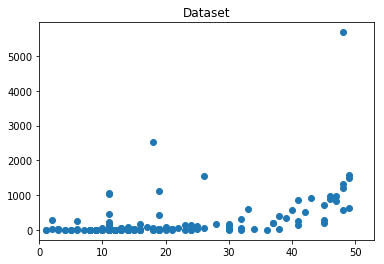

In [47]:
plt.plot()
plt.scatter(data['# Games'],data['Points'])
plt.xlim([0, 53])
plt.title('Dataset')
plt.show()

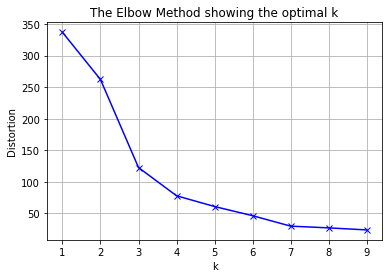

In [48]:
plt.plot([i for i in range(1,10)], distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('flay.png')
plt.grid()
plt.show()
